In [1]:
# Install package for Lasso
if(!require("glmnet")){
    install.packages("glmnet")
}

# Install package for HMLasso
if(!require("hmlasso")){
    install.packages("hmlasso")
}

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 3.0-2


Loading required package: hmlasso



## Lasso vs HMLasso

In [2]:
library(glmnet)
library(hmlasso)
data(QuickStartExample)
# fit_glmnet <- glmnet(x, y)
# fit_hmlasso <- hmlasso(x, y)
# plot(fit_glmnet, xvar="lambda")
# plot(fit_hmlasso)

In [3]:
# Cross Validation for Lasso
cv_fit_glmnet <- cv.glmnet(x, y)
fit_glmnet <- glmnet(x, y, lambda=cv_fit_glmnet$lambda.min)

# Cross Validation for HMLasso
cv_fit_hmlasso <- cv.hmlasso(x, y)
fit_hmlasso <- hmlasso(x, y, lambda=cv_fit_hmlasso$lambda.min)

In [4]:
show_coef <- function(beta, title) {
    idx <- 1:length(beta)
    plot(idx, beta, col="royal blue", pch=19, xlab="dimension", ylab="magnitude", main=title)
    for (i in idx) {
        lines(c(idx[i], idx[i]), c(0, beta[i]), col="royal blue", lwd=2)
    }
    lines(c(idx[1]-2, idx[length(idx)]+2), c(0,0), col="dark green", lwd=2)
}

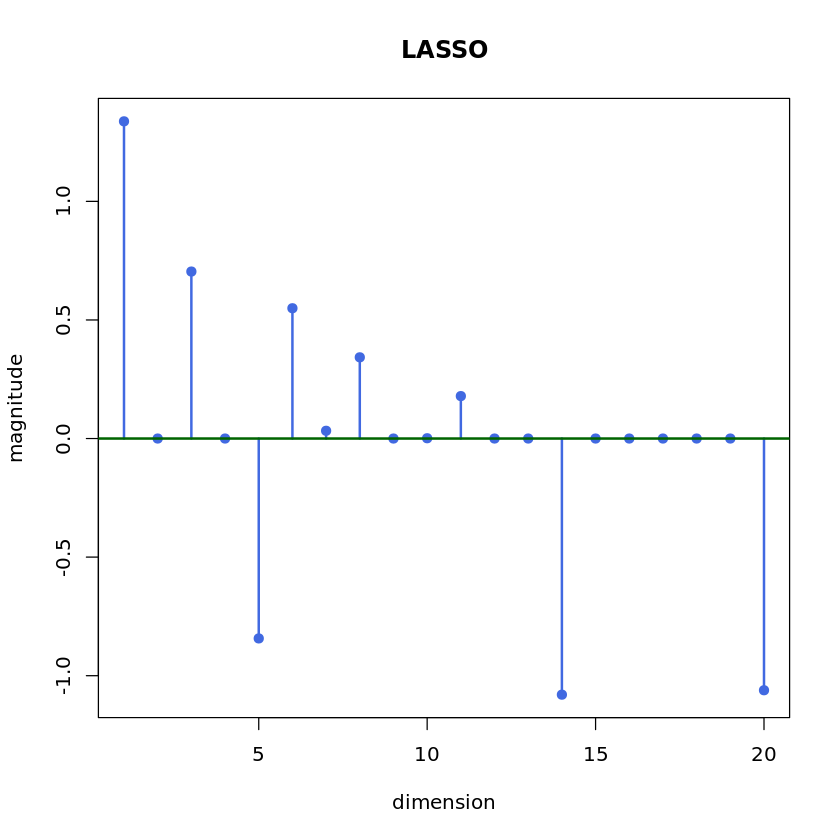

In [5]:
# Lasso
show_coef(fit_glmnet$beta, "LASSO")

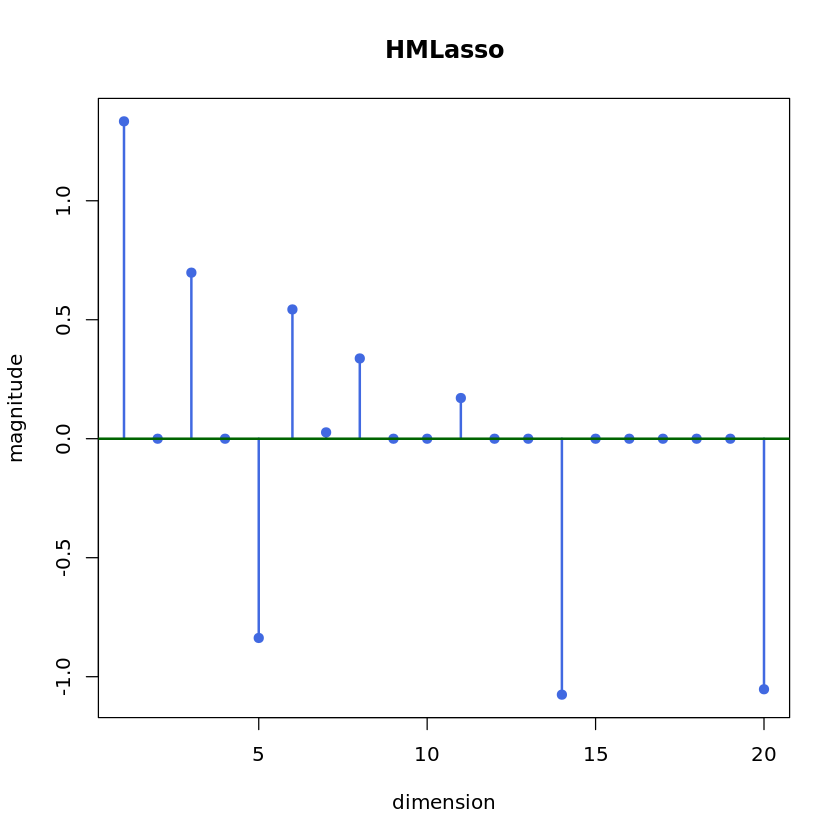

In [6]:
# HMLasso
show_coef(fit_hmlasso$beta, "HMLasso")

In [7]:
library(glmnet)
data(QuickStartExample)
x_miss <- x
len <- length(x)
misses <- sample(1:len, len%/%2) 
x_miss[misses] <- NA

In [8]:
# fit_glmnet <- glmnet(x_miss, y)
# Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : NA/NaN/Inf in foreign function call (arg 5)
# Traceback:
# 
# 1. glmnet(x_miss, y)
# 2. elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, 
#  .     alpha, nobs, nvars, jd, vp, cl, ne, nx, nlam, flmin, ulam, 
#  .     thresh, isd, intr, vnames, maxit)

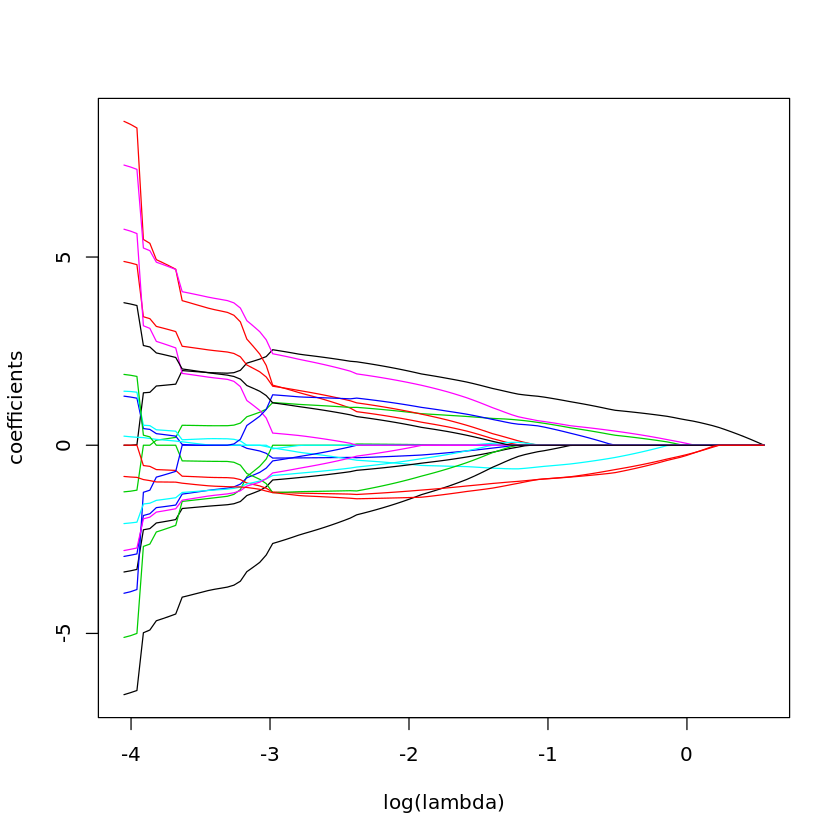

In [9]:
fit_hmlasso <- hmlasso(x_miss, y) 
plot(fit_hmlasso)

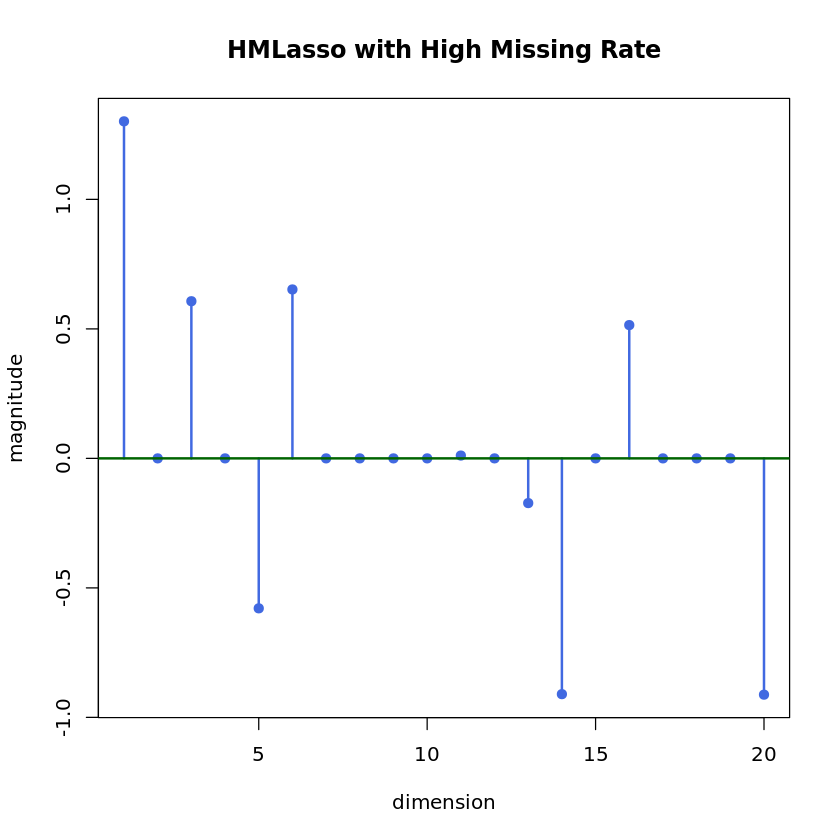

In [10]:
# Cross Validation for HMLasso
cv_fit_hmlasso <-cv.hmlasso(x_miss, y)
fit_hmlasso <- hmlasso(x_miss, y, lambda=cv_fit_hmlasso$lambda.min)
show_coef(fit_hmlasso$beta, "HMLasso with High Missing Rate")